## Oppstart

### Preamble

Contains imports and some utility code.

In [1]:
from dhlab.module_update import update, css, code_toggle

In [2]:
import dhlab.graph_networkx_louvain as gnl
import dhlab.nbtext as nb
import networkx as nx
%matplotlib inline

In [3]:
import pandas as pd

In [4]:
css()

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

### Define a corpus

Bruk gjerne Dewey eller temaord for å definere korpuset, hold det forholdsvis lite rundt 200 bøker.

In [7]:
collword = 'erotikk'

In [8]:
korpus = nb.book_urn(words=[collword], ddk='8%', period=(1960, 2020), limit=500)
len(korpus)

500


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(korpus).head(10)

,0,1,2,3
0,2013022606172,"Skogheim, Dag",Sølvhalsbåndet,1986
1,2007090301012,"Hagerup, Inger",Det kommer en pike gående,1990
2,2013102407067,"Dahl, Willy",Trivialiteter,1986
3,2013072508028,"Rem, Tore",Sin egen herre,2011
4,2010063008015,"Siddons, Anne Rivers",Downtown,1998
5,2008110704039,"Rankin, Ian",Døde sjeler,2000
6,2011053108099,"Kjærstad, Jan",Forføreren,1996
7,2008091200031,"Faldbakken, Knut",Når jeg ser deg,1997
8,2014090438006,"Kleypas, Lisa",Elsker i gave ; Ønskebrønnen,2011
9,2013041506124,"Eneroth, Bo",Sammenbruddet,1981


In [10]:
nb.urn_concordance(word=collword, urns=korpus)

"Sølvhalsbåndet, Skogheim, Dag, 1986",subtile tanker om litteratur og,erotikk,", avbryter seg seiv rett"
"Det kommer en pike gående, Hagerup, Inger, 1990",for alt som hadde med,erotikk,å gjøre — uten giftermål
"Trivialiteter, Dahl, Willy, 1986",dem alle : forholdet mellom,erotikk,"( samlivsvilkår , konvensjoner m.m"
"Sin egen herre, Rem, Tore, 2011",mye drikke og atskillig ureglementert,erotikk,. De er hva han
"Downtown, Siddons, Anne Rivers, 1998",for det avbrutte forsøket på,erotikk,ute på Sea Island .
"Døde sjeler, Rankin, Ian, 2000","om fyll , spy og",erotikk,.
"Forføreren, Kjærstad, Jan, 1996",den erotiske lidenskapen mindre om,erotikk,enn om erkjennelse .
"Forføreren, Kjærstad, Jan, 1996",i noe som kunne kalles,erotikk,", noe som på samme"
"Forføreren, Kjærstad, Jan, 1996",av undertrykt seksualitet og sublimert,erotikk,på samme måte som ekstreme
"Når jeg ser deg, Faldbakken, Knut, 1997",blunk med en dose uhemmet,erotikk,.
"Elsker i gave ; Ønskebrønnen, Kleypas, Lisa, 2011",- Jeg snakker ikke om,erotikk,", din gjenstridige stut ."


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [11]:
small_window = 5
large_window = 10

In [12]:
def collpart(collword, urns, win = 5, limit = 10000):
    return nb.urn_coll(collword, urns = korpus, after = win, before = win, limit = 10000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
small = collpart(collword, nb.pure_urn(korpus), win = 5)
large = collpart(collword, nb.pure_urn(korpus), win = 10)



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(small)
nb.normalize_corpus_dataframe(large)

Inspiser dataene etter normalisering

### Kollokasjonen

In [14]:
small.head()

,0
",",590
og,541
.,506
i,207
av,195


In [15]:
large.head()

,0
",",1014
.,972
og,843
i,416
som,334


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [16]:
delta = pd.DataFrame()

In [17]:
delta['small'] = small[0]
delta['large'] = large[0]

In [18]:
delta['ratio'] = small[0]/large[0]

In [19]:
#delta['log'] = np.log(delta['ratio'])

In [20]:
#delta['score'] = delta['ratio'] * delta['log']

In [21]:
delta[(delta['small'] > 2) & (delta['ratio'] > 0.6)].sort_values(by='ratio', ascending=False)

,small,large,ratio
transcendens,3,3,1.000000
fullstendig,5,5,1.000000
delvis,4,4,1.000000
eksempel,5,5,1.000000
åndsliv,4,4,1.000000
...,...,...,...
også,25,40,0.625000
om,114,183,0.622951
av,195,314,0.621019
Hun,24,39,0.615385


In [22]:
delta.loc[[',','.','og','!', '?']]

,small,large,ratio
",",590,1014,0.581854
.,506,972,0.520576
og,541,843,0.641756
!,22,32,0.687500
?,33,72,0.458333


In [23]:
delta_max = delta[delta.small < delta.large][delta.small > 0][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [24]:
delta_const = delta[delta.small > 2][delta.ratio > 0.6].sort_values(by='ratio', ascending=False)

In [25]:
delta_max.head(20)

,small,large,ratio
poetisk,9,10,0.900000
lidenskap,9,10,0.900000
hos,9,10,0.900000
vennskap,7,8,0.875000
handlinger,6,7,0.857143
Eros,6,7,0.857143
religion,6,7,0.857143
retning,6,7,0.857143
nærhet,6,7,0.857143
snakke,6,7,0.857143


In [26]:
delta_const

,small,large,ratio
transcendens,3,3,1.000000
fullstendig,5,5,1.000000
delvis,4,4,1.000000
eksempel,5,5,1.000000
åndsliv,4,4,1.000000
...,...,...,...
også,25,40,0.625000
om,114,183,0.622951
av,195,314,0.621019
Hun,24,39,0.615385


In [27]:
delta_max.head(50).index

Index(['poetisk', 'lidenskap', 'hos', 'vennskap', 'handlinger', 'Eros',
       'religion', 'retning', 'nærhet', 'snakke', 'politikk', 'kjærleik',
       'finnes', 'Hva', 'familie', 'slett', 'Kjærlighet', 'særlig', 'uten',
       'blei', 'lot', 'folk', 'luften', 'blandet', 'romantikk', 'dag',
       'ekteskapet', 'følger', 'Mitt', 'taus', 'galskap', 'dikt', 'F',
       'tanker', 'gjer', 'mindre', 'full', 'ja', 'fantasi', 'gammel', 'enn',
       'all', 'natur', 'gjøre', 'kjærlighet', 'død', 'lite', 'underernært',
       'god', 'drikke'],
      dtype='object')

In [28]:
delta_const.head(50).index

Index(['transcendens', 'fullstendig', 'delvis', 'eksempel', 'åndsliv',
       'snakker', 'sanselighet', 'Aldri', 'privat', 'riktig', 'iallfall',
       'minst', 'innett', 'midt', 'opphavet', 'utvilsomt', 'sadisme', 'dreier',
       'Ein', 'mord', 'sterk', 'stemning', 'faste', 'skrik', '11.1.1', 'hat',
       'sensualitet', 'nødvendigvis', 'sann', 'fridom', 'tanke',
       'uforpliktende', 'Madeleines', 'interesse', 'skrive', 'Tidligere',
       'spill', 'følelse', 'kristen', 'språk', 'mystikk', 'Natur', 'smilet',
       'passer', 'grov', 'lek', 'Desperate', 'viktige', 'fruktbarhet',
       'parasitær'],
      dtype='object')

# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

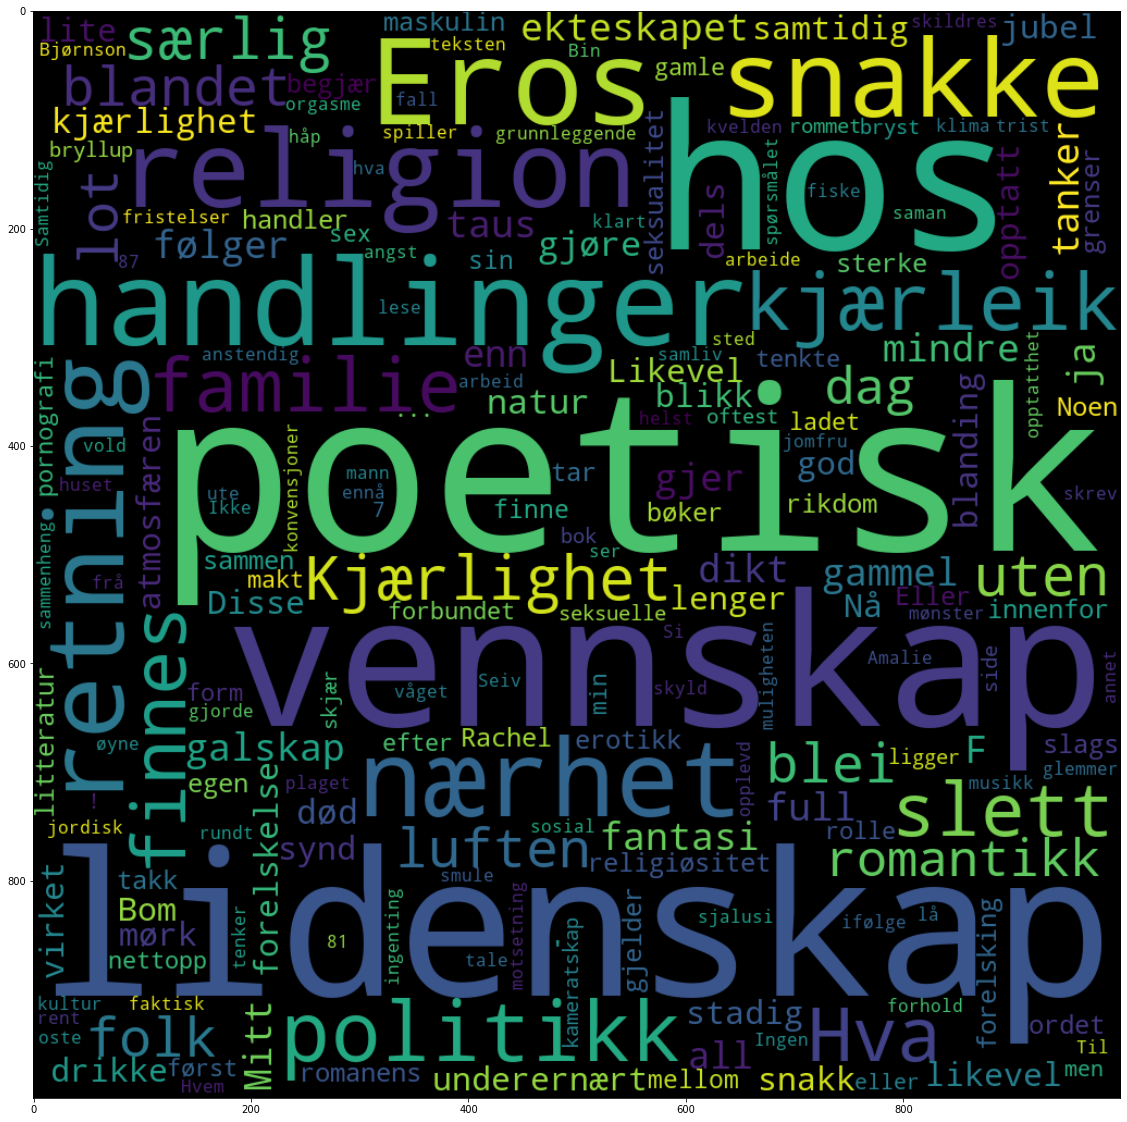

In [29]:
nb.cloud(nb.frame(delta_max.ratio))

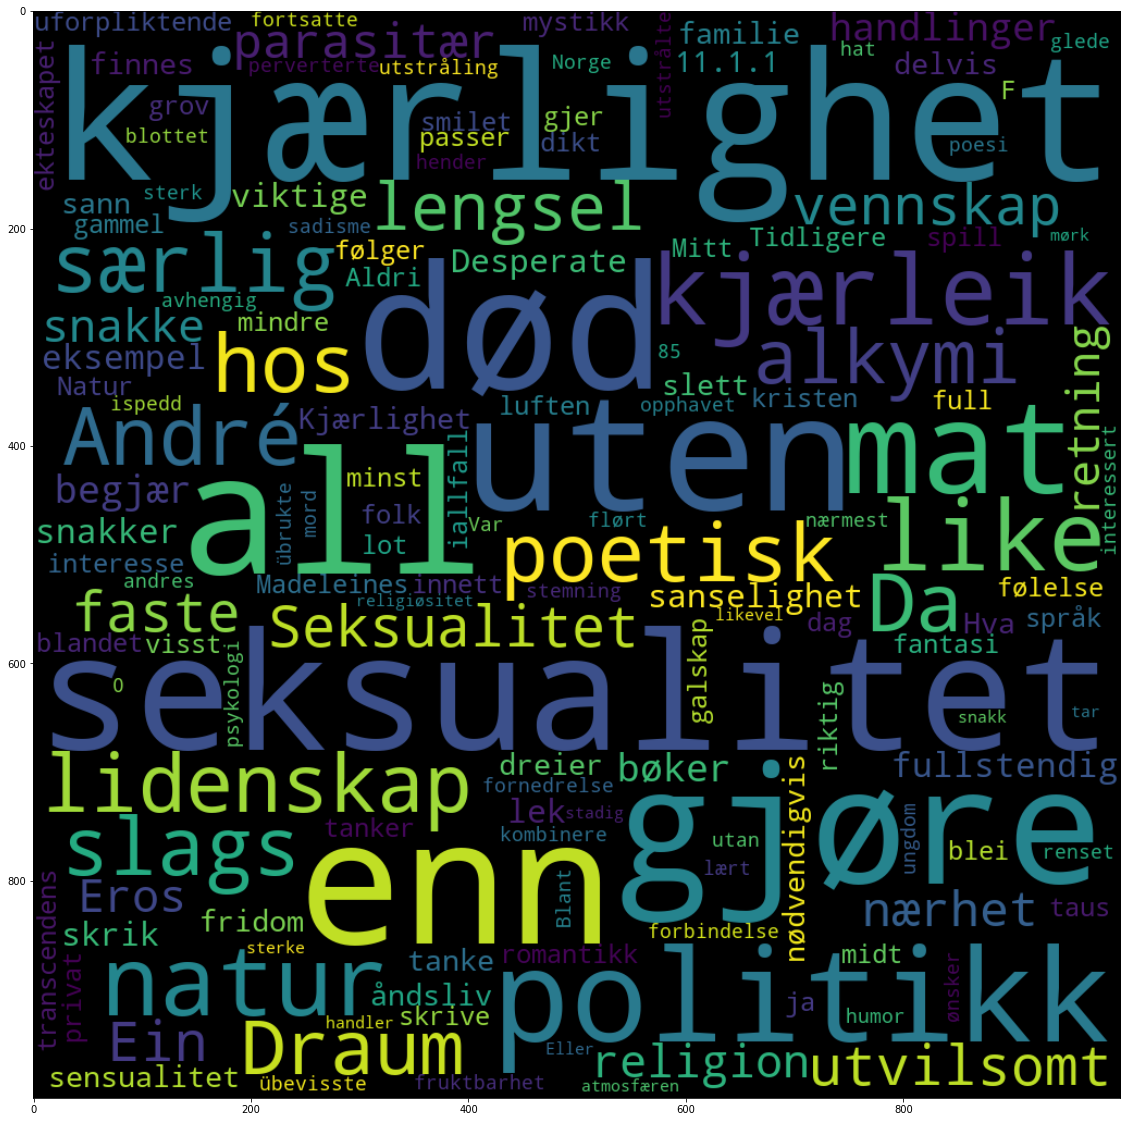

In [30]:
nb.cloud(nb.frame(delta_const.head(150).small/delta_const.small.sum()))